In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')
print(dataset.describe)
print(dataset.columns)
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:, 4].values

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [3]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<function matplotlib.pyplot.show(*args, **kw)>

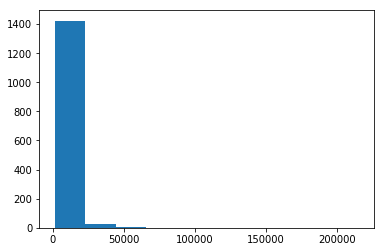

In [9]:
# make a histogram of Lot area
plt.hist(dataset['LotArea'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

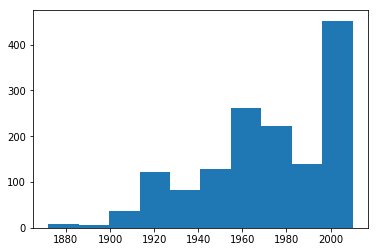

In [10]:
# make a histogram of YearBuilt
plt.hist(dataset['YearBuilt'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

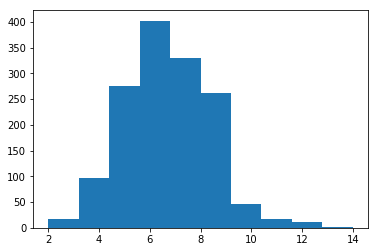

In [11]:
# make a histogram of TotRmsAbvGrd
plt.hist(dataset['TotRmsAbvGrd'])
plt.show

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linearRegression=LinearRegression()
linearRegression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# plt.scatter(X,y)
# plt.show
print(X.shape)
y=y.reshape(-1,1)
print(y.shape)

(1460, 8)
(1460, 1)


In [7]:
plt.scatter(X['LotArea'],y)
plt.show

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [8]:
plt.scatter(X['YearBuilt'],y)
plt.show

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

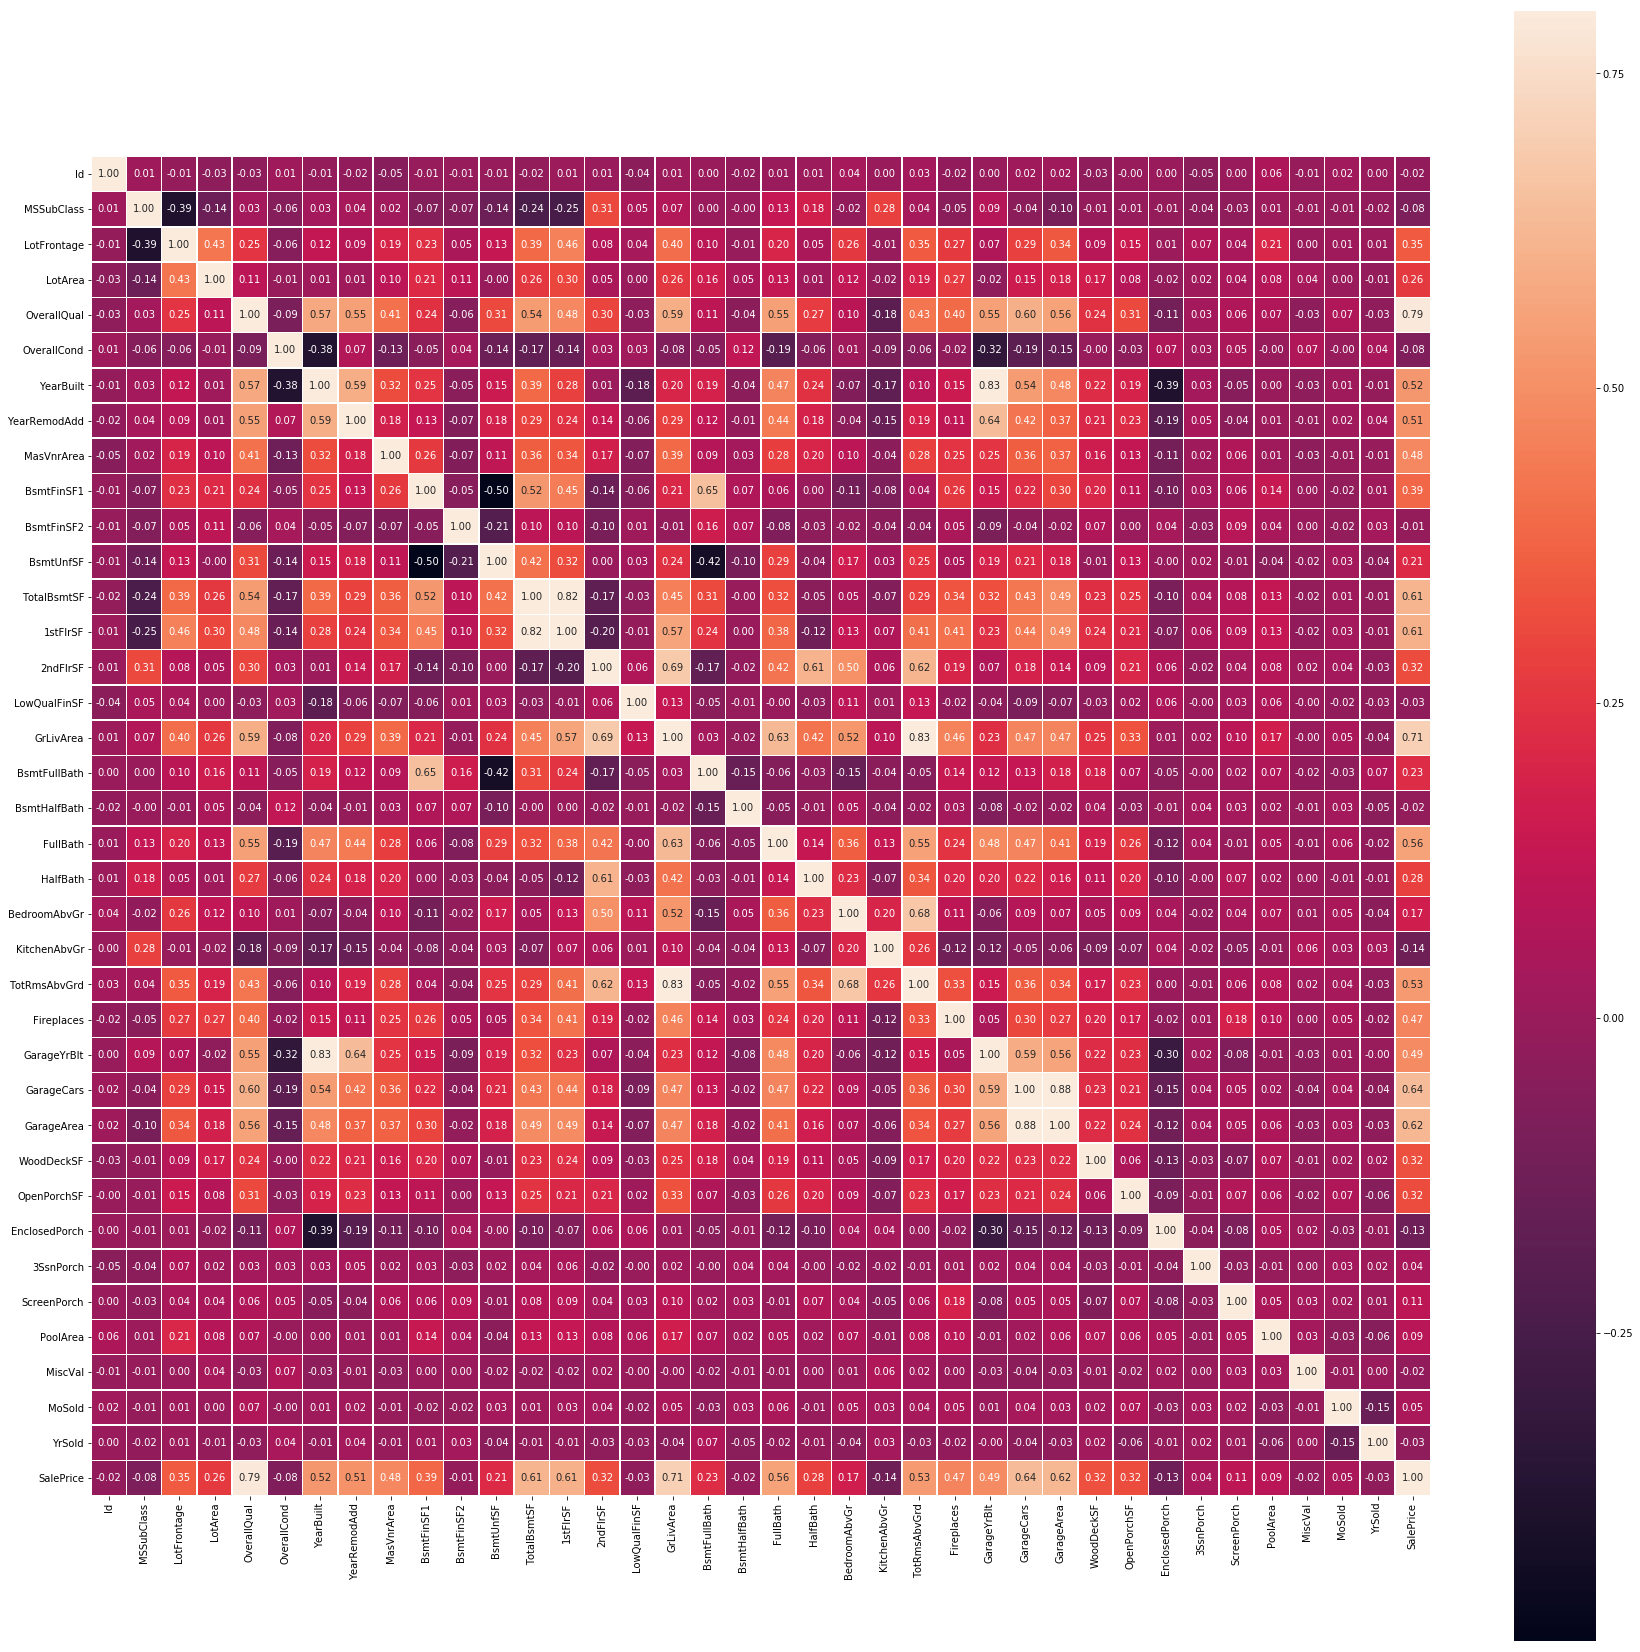

In [15]:
import seaborn as sns
#correlation matrix
corrmat=dataset.corr()
fig=plt.figure(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True, fmt=".2f",linewidths=.5)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

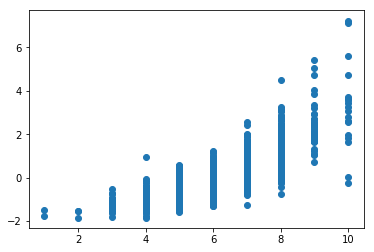

In [16]:
plt.scatter(dataset['OverallQual'],y)
plt.show

In [ ]:
test_dataset=pd.read_csv('test.csv')
print(test_dataset.describe)
print(test_dataset.columns)
print(test_dataset.shape)

In [17]:
val_predictions = linearRegression.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

 mae_val=0.3585551391658395


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 4)
# X_poly = poly_reg.fit_transform(X_train)
# poly_reg.fit(X_poly, y_train)



In [18]:
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

 mae_val=0.27511539162447024


In [23]:
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)

C:\Users\tanisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [24]:
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

 mae_val=0.28938446260951295


In [45]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d 

 mae_val=0.26943874361946357
 mae_val=0.2804847521778652


In [46]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d 

 mae_val=0.2657981706695574
 mae_val=0.2767267725474687


In [2]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea','OverallQual']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d 

 mae_val=0.2489750317013731


C:\Users\tanisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 mae_val=0.2537349717214927


In [31]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF','TotalBsmtSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea','OverallQual']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

 mae_val=0.24189765805717625
 mae_val=0.24627399623615331


In [48]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF','TotalBsmtSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea','OverallQual','GrLivArea']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d 

 mae_val=0.2404322023786879
 mae_val=0.23631067330916616


In [42]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF','TotalBsmtSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea','OverallQual','GrLivArea']
X = dataset[features]
# Create target object and call it y
y = dataset.iloc[:, 80].values
print(y[0])
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
print(y[0])
print(sc_y.inverse_transform(y[0]))
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# print(y_test)

208500
[0.34727322]
[208500.]


C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [50]:
# path to file you will use for predictions
test_data_path = 'test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# Feature Scaling
test_X = test_data[features]
test_X = sc_X.fit_transform(test_X)


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
test_X=imp.fit_transform(test_X) 

imp = SimpleImputer(missing_values=np.inf, strategy='mean')
test_X=imp.fit_transform(test_X) 



# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
# test_X = X[features]


# make predictions which we will submit. 
test_preds = lin_reg_3.predict(test_X)
test_preds = sc_y.inverse_transform(test_preds)

# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.

output = pd.DataFrame({'Id': test_data.Id,
                      'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tanisha\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
# Create target object and call it y
y = dataset.iloc[:, 80].values
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF','TotalBsmtSF', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'PoolArea','YearRemodAdd', 'GarageArea','OverallQual','GrLivArea']
X = dataset[features]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVR
from sklearn.svm import SVR
lin_reg_2 = SVR(kernel='rbf')
lin_reg_2.fit(X_train, y_train)
val_predictions = lin_reg_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
lin_reg_3 = RandomForestRegressor(random_state=1,n_estimators=100)
lin_reg_3.fit(X_train, y_train)
val_predictions = lin_reg_3.predict(X_test)
from sklearn.metrics import mean_absolute_error
mae_val=mean_absolute_error(val_predictions,y_test)
print(" mae_val={}".format(mae_val))

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

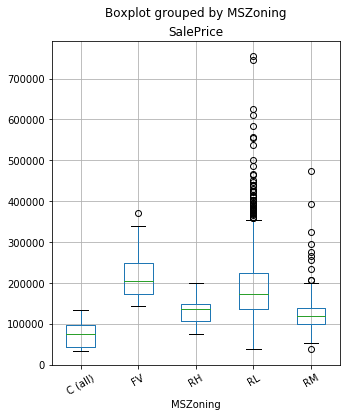

In [4]:
dataset.boxplot('SalePrice','MSZoning',rot=30,figsize=(5,6))

In [5]:
cat_dataset = dataset.select_dtypes(include=['object']).copy()
print(cat_dataset.info)

<bound method DataFrame.info of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl

In [6]:
print(cat_dataset.isnull().values.sum())

6617


In [7]:
print(cat_dataset.isnull().sum())

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64


In [15]:
col=cat_dataset.columns[cat_dataset.isnull().any()].values
print(col)
print(col.size)

['Alley' 'MasVnrType' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinType2' 'Electrical' 'FireplaceQu' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PoolQC' 'Fence' 'MiscFeature']
16


In [16]:
for col_name in col:
    cat_dataset = cat_dataset.fillna(cat_dataset[col_name].value_counts().index[0])

In [17]:
print(cat_dataset.isnull().values.sum())

0


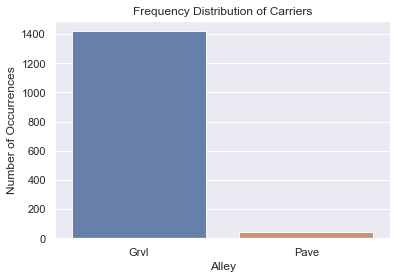

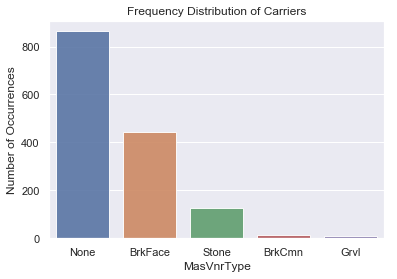

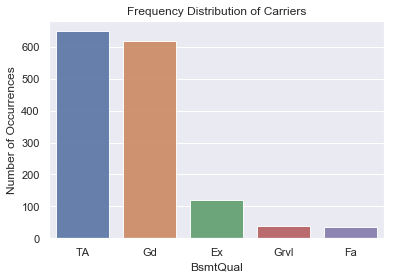

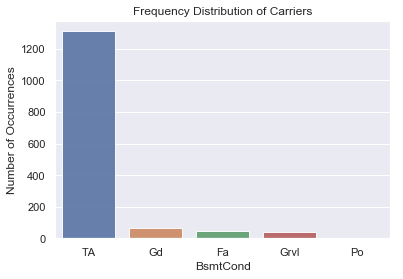

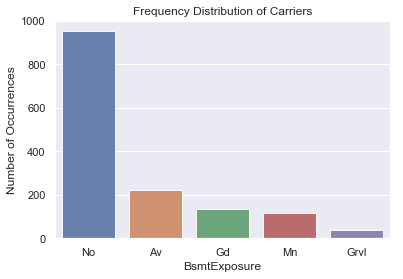

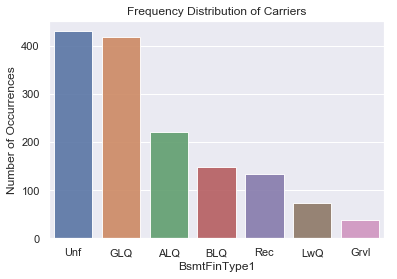

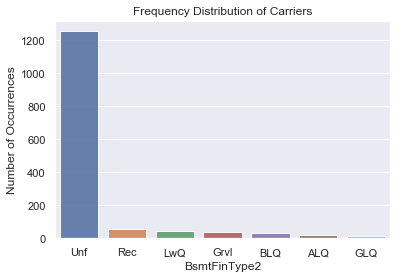

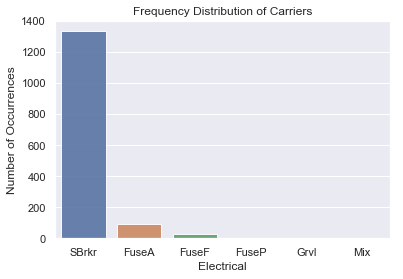

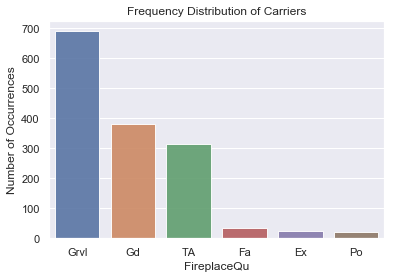

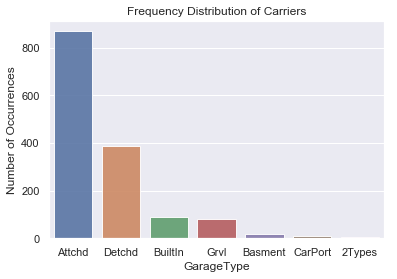

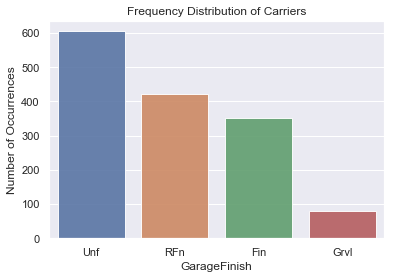

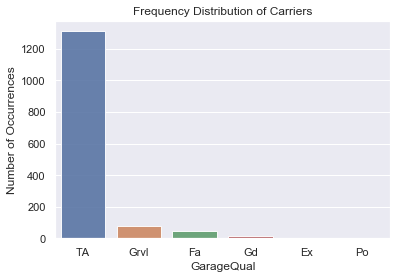

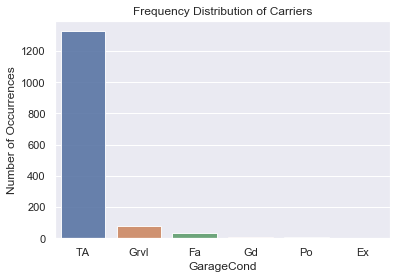

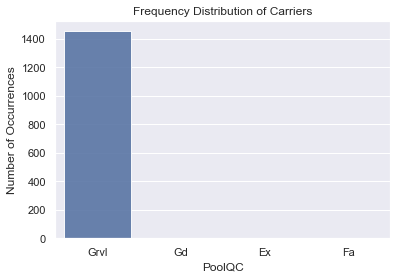

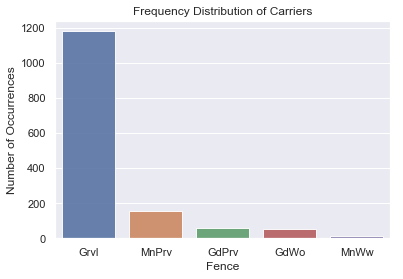

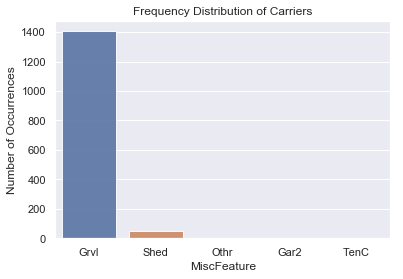

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for col_name in col:
    carrier_count = cat_dataset[col_name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
    plt.title('Frequency Distribution of Carriers')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col_name, fontsize=12)
    plt.show()

In [21]:
all_column=cat_dataset.columns.values
print(all_column)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


C:\Users\tanisha\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


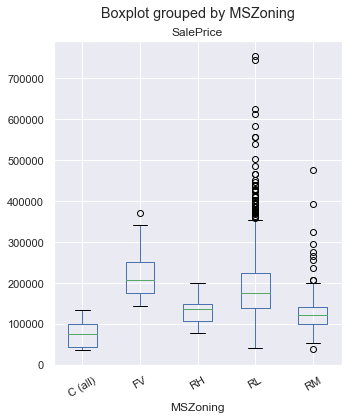

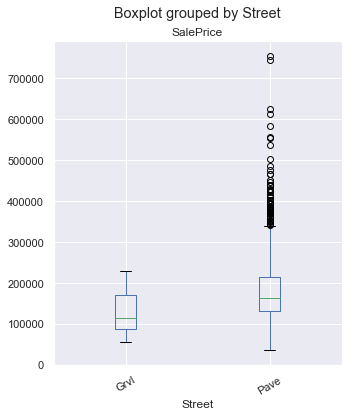

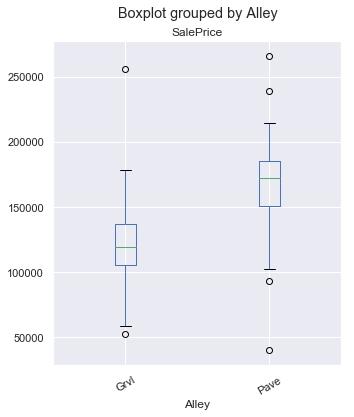

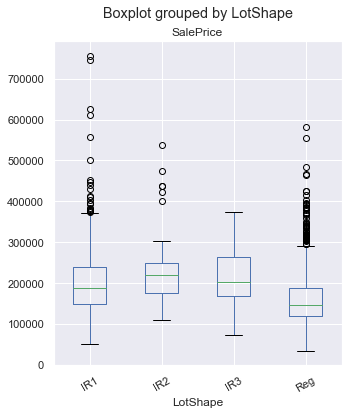

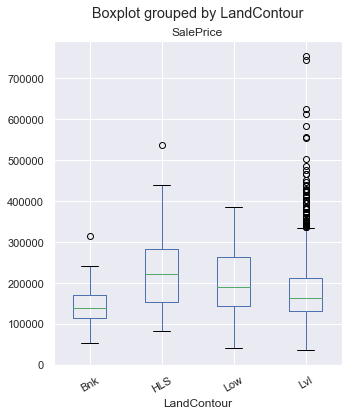

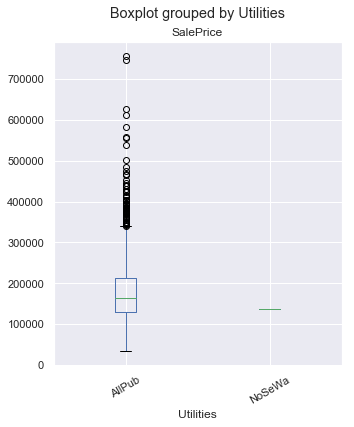

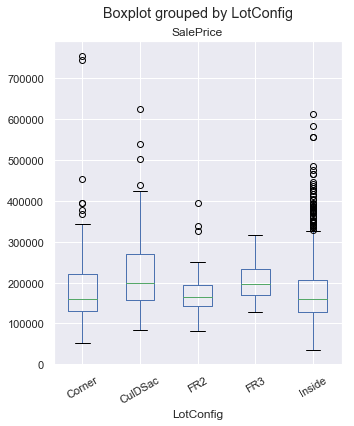

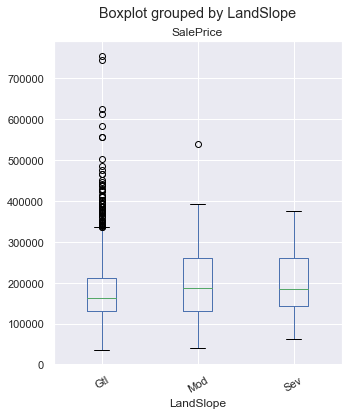

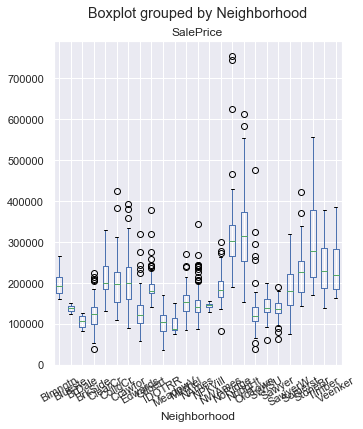

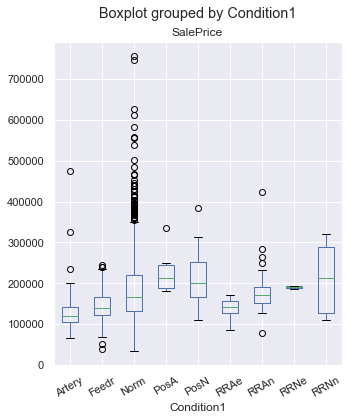

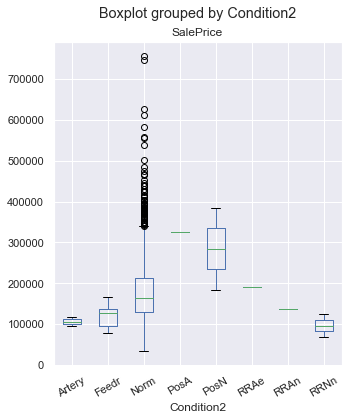

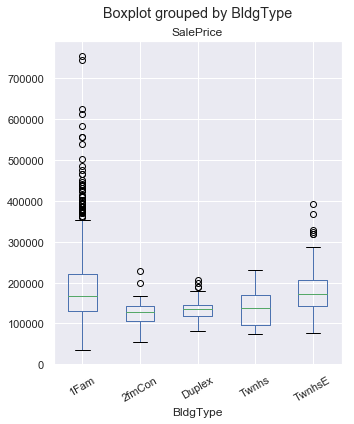

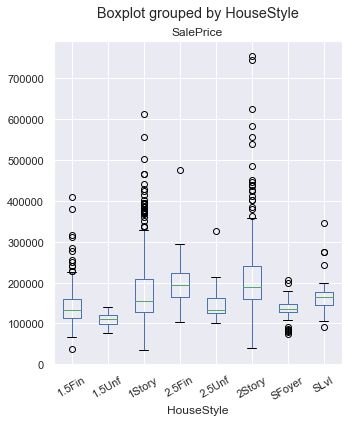

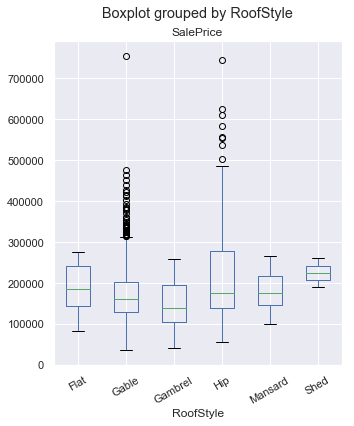

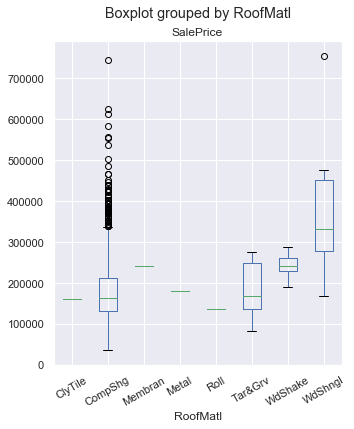

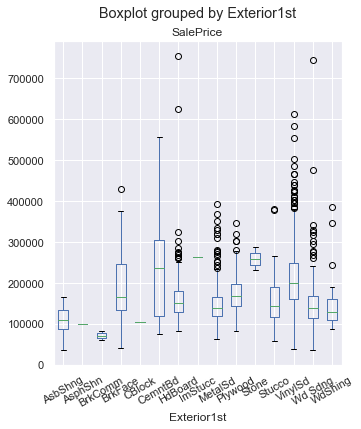

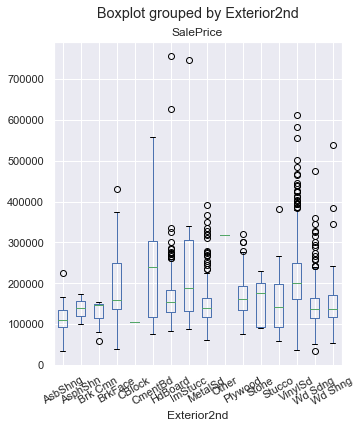

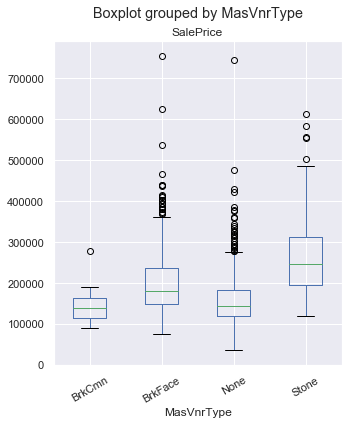

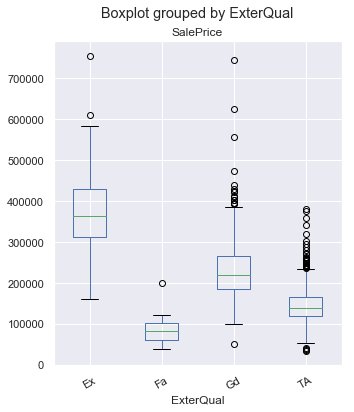

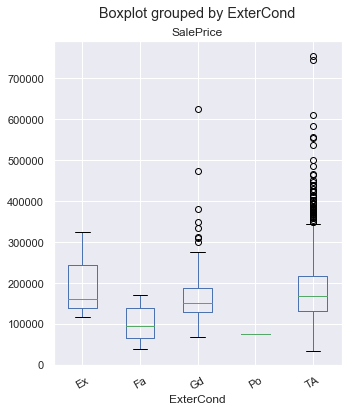

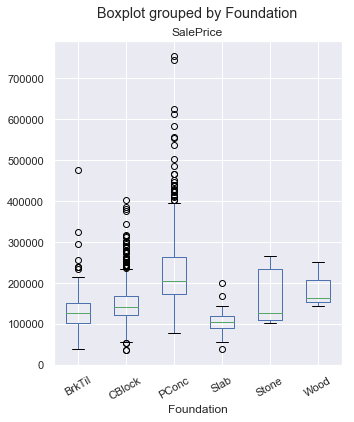

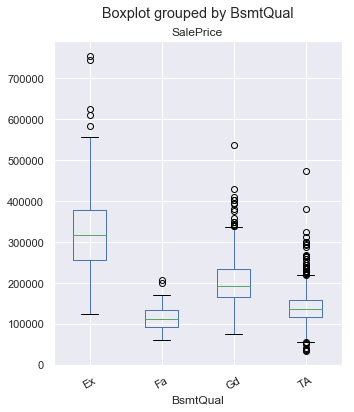

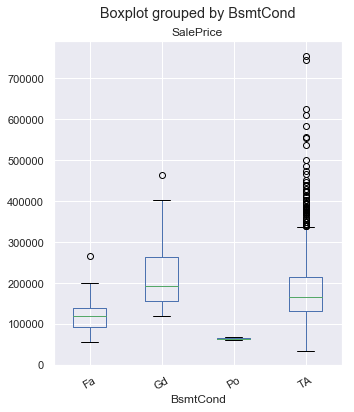

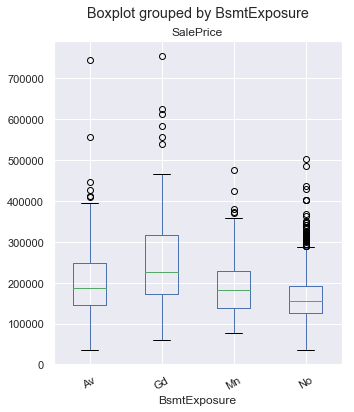

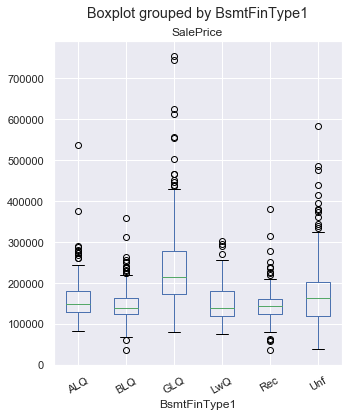

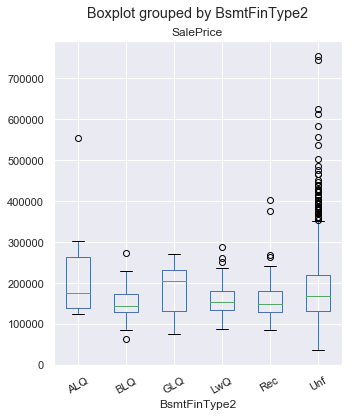

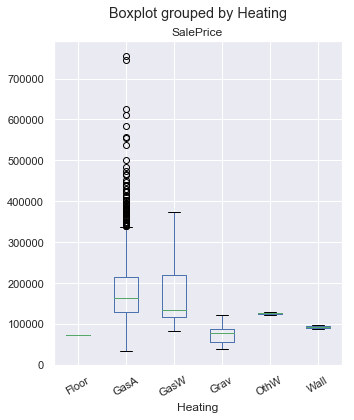

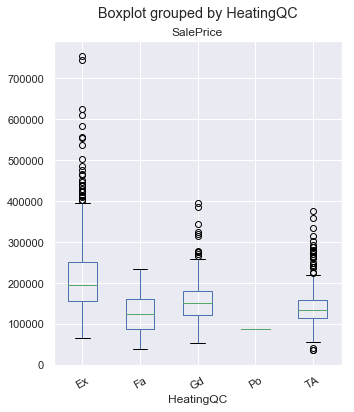

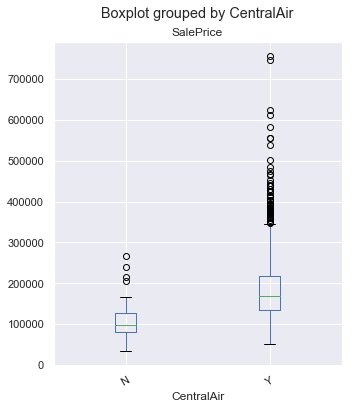

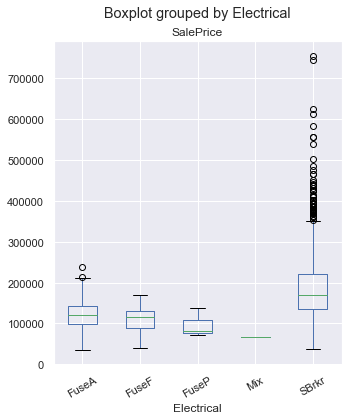

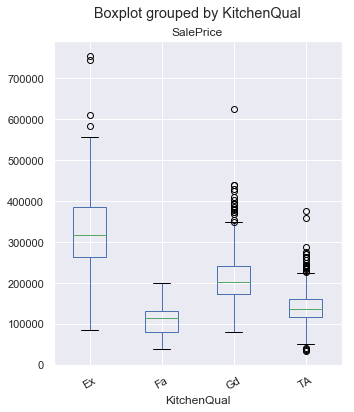

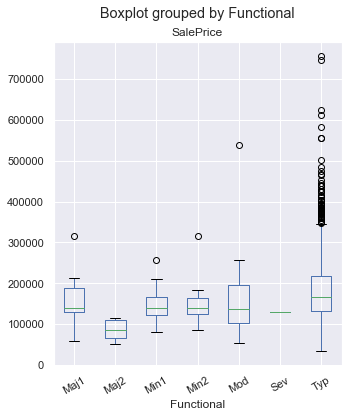

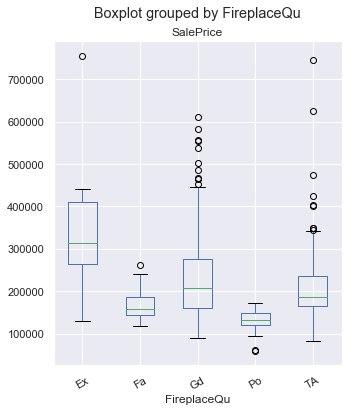

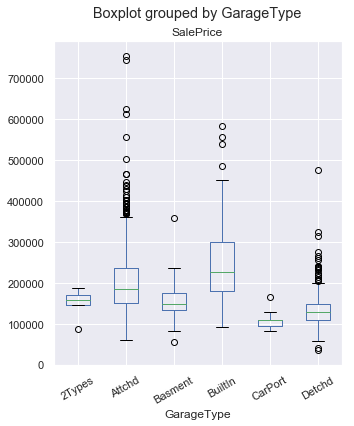

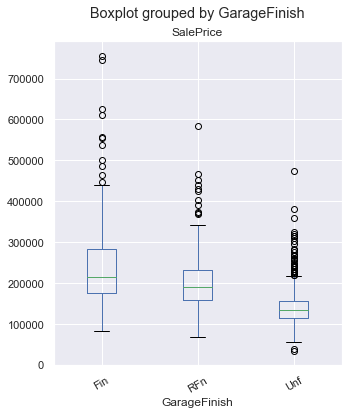

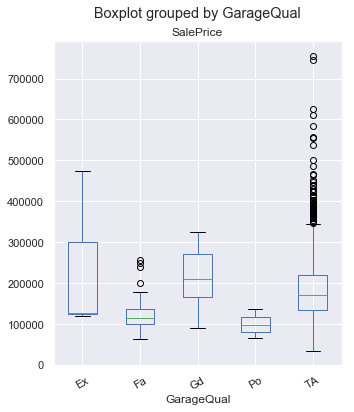

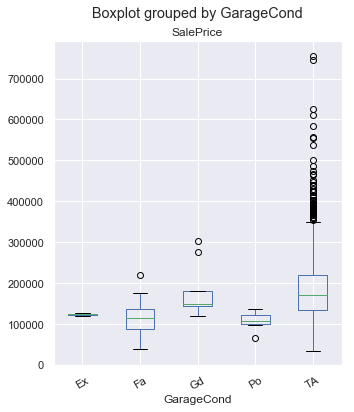

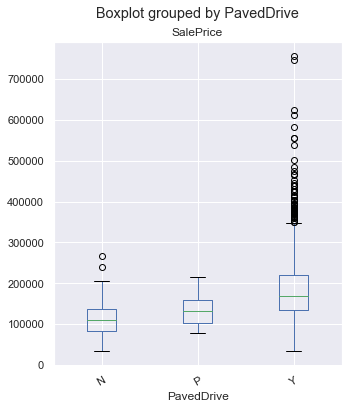

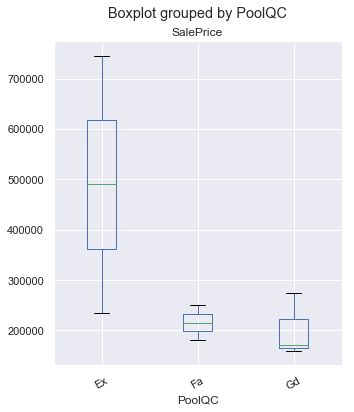

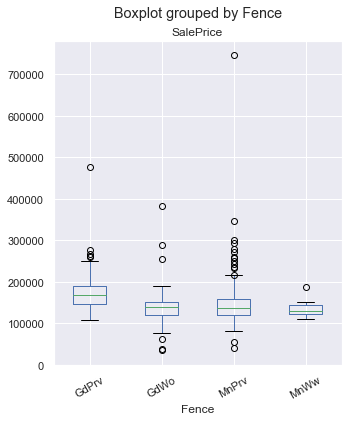

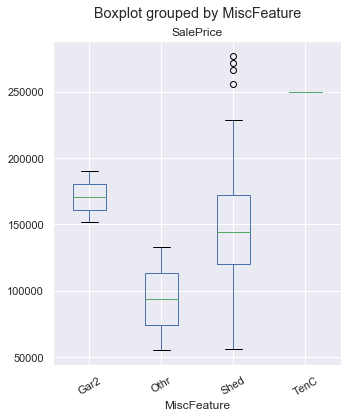

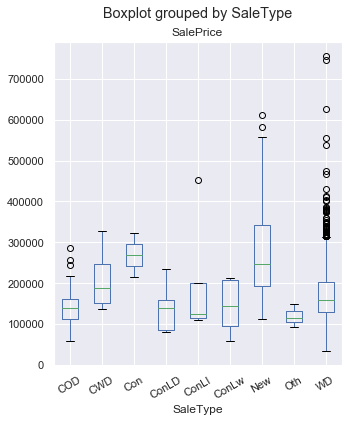

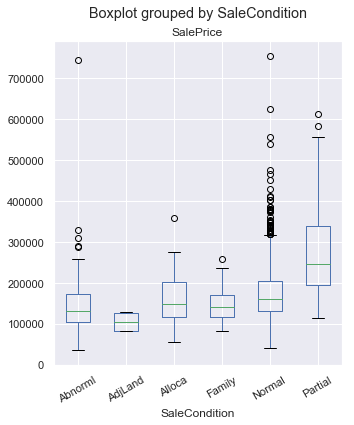

In [22]:
for col in all_column:
    dataset.boxplot('SalePrice',col,rot=30,figsize=(5,6))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


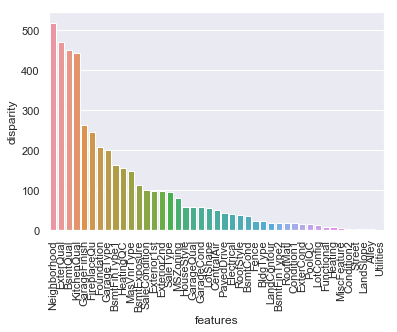

In [28]:
from scipy import stats
from scipy.stats import norm
cat = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
print(cat)
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_dataset['SalePrice'] = dataset.SalePrice.values
k = anova(cat_dataset) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

C:\Users\tanisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'FacetGrid' object has no attribute 'show'

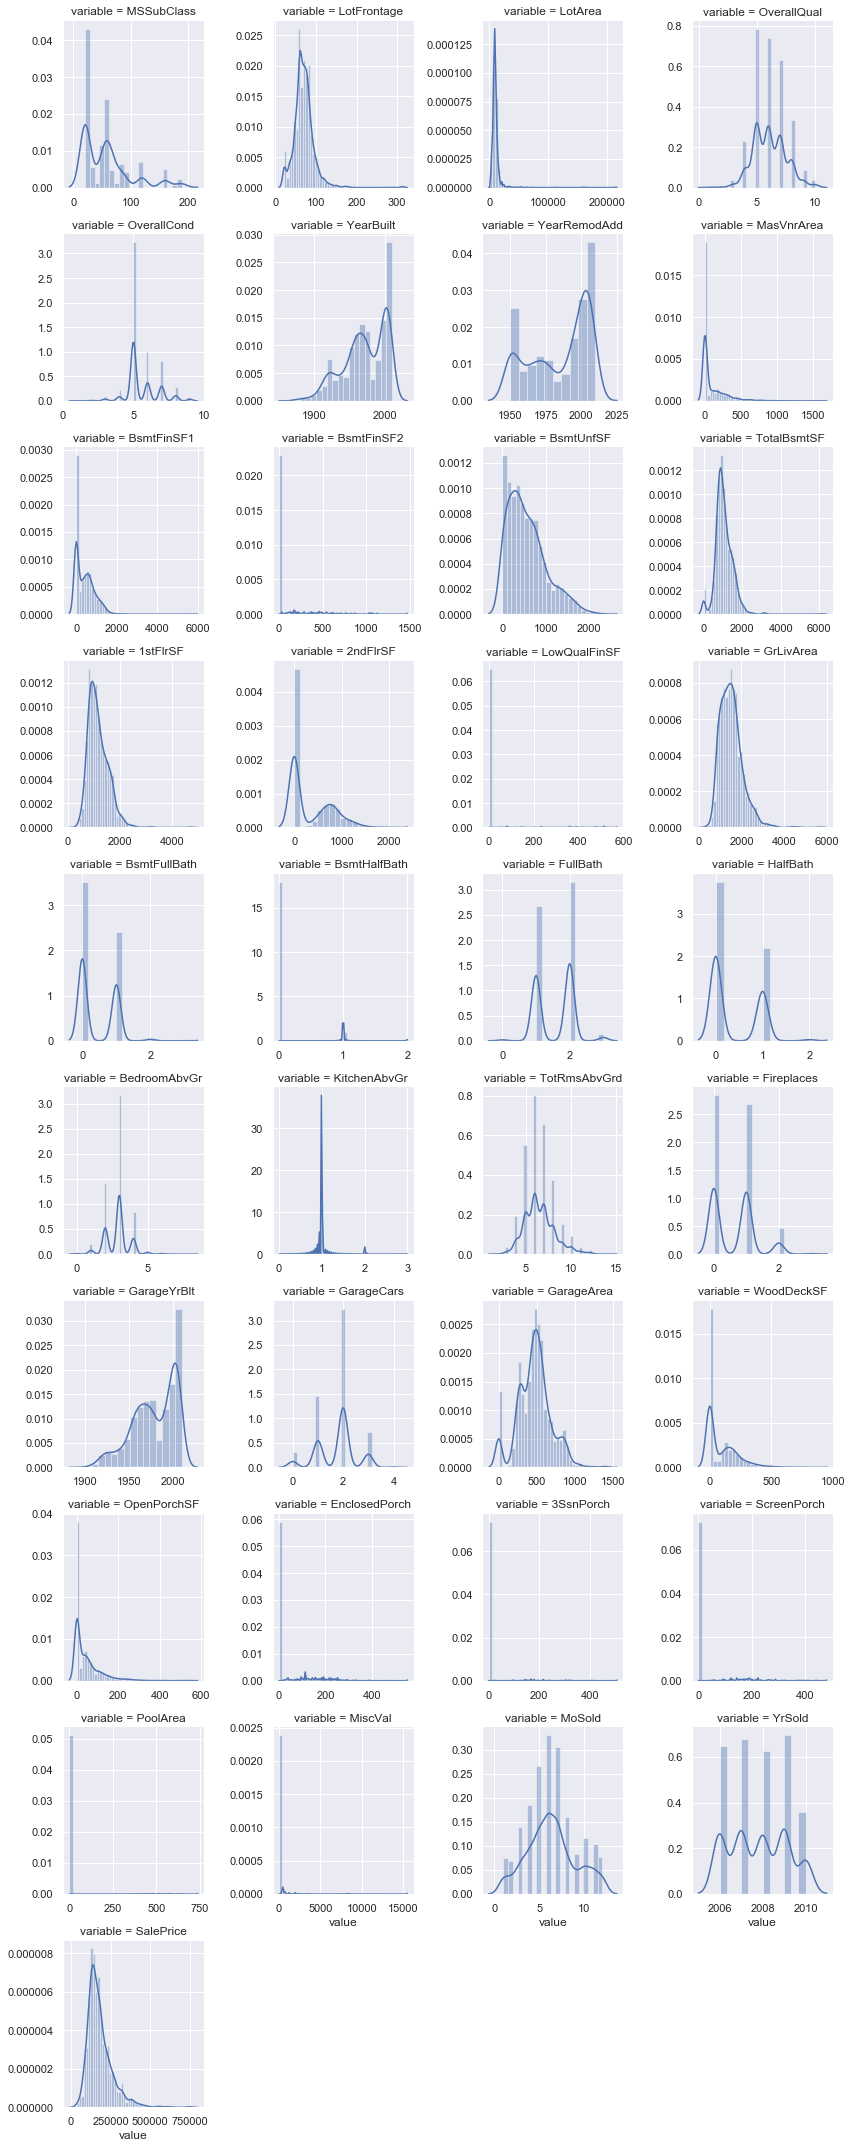

In [30]:
#create numeric plots
num = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(dataset, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1.show()